In [1]:
from pathlib import Path
import vaex
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd

from scipy import interpolate

from scipy.stats import norm
from scipy.optimize import minimize


import gaiaxpy as gxp 

import emcee
import corner

import os

from multiprocessing import Pool
from matplotlib.pyplot import figure, show
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


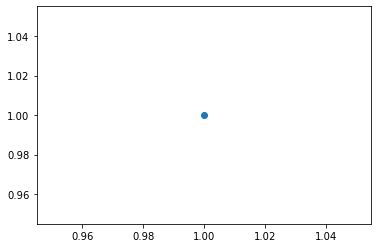

In [2]:
plt.scatter([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)

plt.show()

In [3]:

dataFrame = vaex.open("/net/gaia2/data/users/gaia/gaia-dr3/gaia-dr3.hdf5")


sam = vaex.open("/Users/users/spirov/ClusterProject/GC_membership/data/NGC_6752.hdf5")
sampl = sam[sam["memberprob"]>0.85]

#standardsApogee = vaex.from_csv("/Users/users/spirov/ClusterProject/J_MNRAS_492_1641_Gaia_EDR3 (1)")


clusterFrame = dataFrame.join(sampl, on="source_id",lprefix="d_",how="inner")

ebvFrame = vaex.open("/Users/users/spirov/PopProject/poege5_10kpc_ebvle0.2_Gle16_wJPLUSandJKC.hdf5")

clusterFrame = ebvFrame.join(clusterFrame,on="source_id",lprefix="l_",how="inner")

In [4]:
bprp = clusterFrame.bp_rp.values
mG = clusterFrame.phot_g_mean_mag.values


centr = np.array([287.717102, -59.984554])
R = np.sqrt( (clusterFrame.ra-centr[0])**2 + (clusterFrame.dec-centr[1])**2 )
clusterFrame["offcenter"] = R
Rs = clusterFrame.offcenter.values



a = 0.5
b = 18
cut = np.union1d(np.where(bprp>a), np.where(mG>b))

dCut = np.where(np.log(Rs)>-2)[0]
fCut = np.intersect1d(cut,dCut)

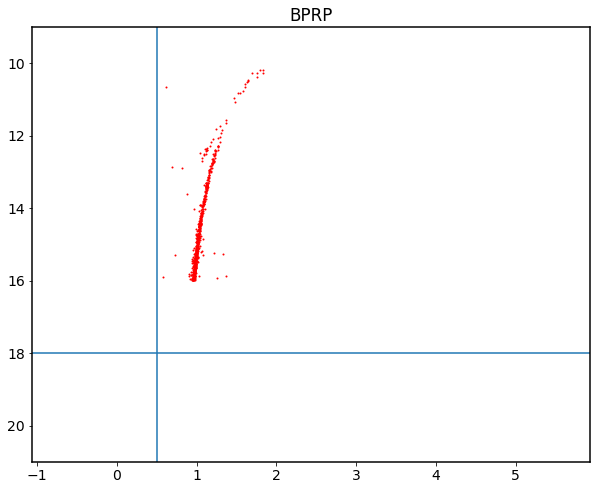

In [5]:
plt.figure(figsize=(10,8))
plt.axhline(b)
xWidth = 7
plt.axvline(a)
plt.plot(bprp[cut], mG[cut], 'ro', ms=1)
bottom, top = plt.xlim()
plt.xlim(bottom-1.5,bottom+xWidth-1.5)
plt.title("BPRP")
plt.ylim(21, 9)
plt.axhline()
plt.show()

# Making Gaia_S

In [6]:
df = clusterFrame

In [7]:
corrFlux = 10**(-51.1/2.5)
AfAv = 1.54
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_u_corr = fi*df.Jpas_flux_u/corrFlux


AfAv = 1.44
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_400_corr = fi*df.Jpas_flux_J0400/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*df.Jpas_flux_J0410/corrFlux


JpasHigh = Jpas_flux_400_corr + Jpas_flux_u_corr+Jpas_flux_410_corr

#-------------------------
AfAv = 1.36
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_420_corr = fi*df.Jpas_flux_J0420/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_410_corr = fi*df.Jpas_flux_J0410/corrFlux

JpasMid = Jpas_flux_410_corr+Jpas_flux_420_corr

AfAv = 1.33
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_430_corr = fi*df.Jpas_flux_J0430/corrFlux

#--------------------------

AfAv = 0.865
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_SDDS_corr = fi*df.Jpas_flux_iSDSS/corrFlux

#--------------------------




In [8]:
AfAv = 1.54
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_u_corr = fi*df.Jpas_flux_error_u/corrFlux


AfAv = 1.44
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_400_corr = fi*df.Jpas_flux_error_J0400/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_410_corr = fi*df.Jpas_flux_error_J0410/corrFlux



#-------------------------
AfAv = 1.36
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_420_corr = fi*df.Jpas_flux_error_J0420/corrFlux

AfAv = 1.4
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_410_corr = fi*df.Jpas_flux_error_J0410/corrFlux


AfAv = 1.33
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_430_corr = fi*df.Jpas_flux_error_J0430/corrFlux

#--------------------------

AfAv = 0.865
fi = 10**(df.ebv*AfAv*3.1/2.5)
Jpas_flux_err_SDDS_corr = fi*df.Jpas_flux_error_iSDSS/corrFlux

#-------------------------


In [9]:
df["JfSSDS"] = Jpas_flux_SDDS_corr
df["Jf430"] = Jpas_flux_430_corr
df["Jf410"] = Jpas_flux_410_corr
df["Jf400"] = Jpas_flux_400_corr
df["Jfu"] = Jpas_flux_u_corr


df["JfeSSDS"] = Jpas_flux_err_SDDS_corr
df["Jfe430"] = Jpas_flux_err_430_corr
df["Jfe410"] = Jpas_flux_err_410_corr
df["Jfe400"] = Jpas_flux_err_400_corr
df["Jfeu"] = Jpas_flux_err_u_corr

In [10]:
def mag(f):
    return -2.5*np.log10(f)

df["JpasHigh"] = mag(JpasHigh)
df["JpasMid"] = mag(JpasMid)
df["Jpas420"] = mag(Jpas_flux_420_corr)
df["Jpas430"] = mag(Jpas_flux_430_corr)
df["JpasSDSS"] = mag(Jpas_flux_SDDS_corr)


In [11]:
name = "Gaia_s"

mag = df.JpasHigh-df.Jpas430
MPivot = df.Jpas430-df.JpasSDSS
myCol = mag-MPivot

df["CustomCol"] = myCol

color =  df.CustomCol.values


In [12]:
magErrHigh = np.sqrt(df.Jfeu**2+df.Jfe400**2+df.Jfe400**2)*(2.5/np.log(10))/(df.Jfu + df.Jf400 + df.Jf410)
magErr430 = df.Jfe430*(2.5/np.log(10))/(df.Jf430)
magErrSSDS = df.JfeSSDS*(2.5/np.log(10))/(df.JfSSDS)

Efirst = np.sqrt(magErrHigh**2+magErr430**2)
Esecond = np.sqrt(magErr430**2+magErrSSDS**2)

fErr = np.sqrt(Efirst**2+Esecond**2)



df["error_color_mag"] = fErr

skip


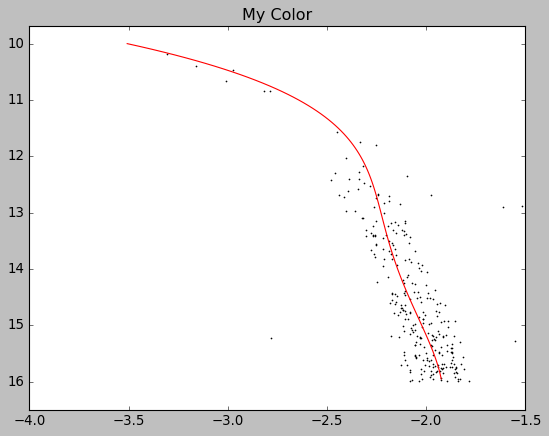

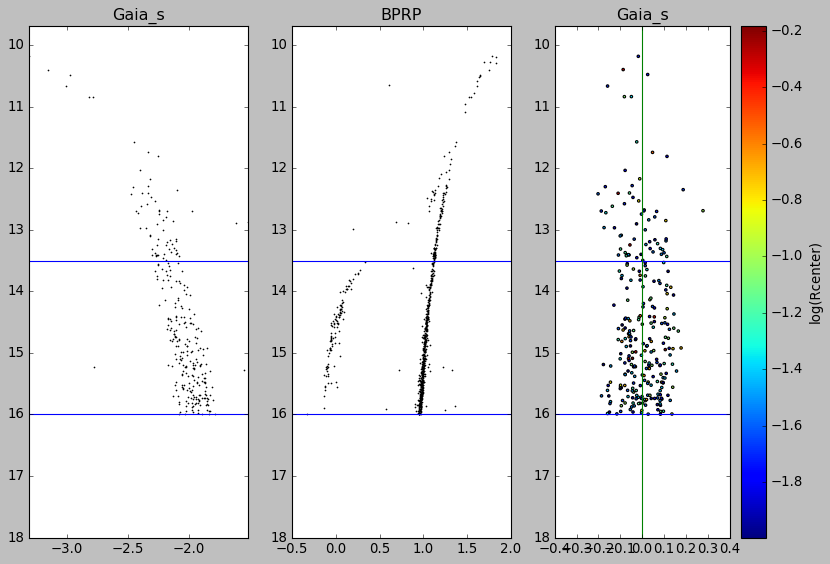

In [13]:
H = fCut
col = color[H]

point = 16
p2 =13.5


bot = 10#11.7
obprp=np.copy(bprp)
plt.style.use('classic')
nG = clusterFrame.phot_g_mean_mag.values[H]

bins = np.linspace(bot, point+0.1, 15)

bc =[]
mu=[]
sig=[]
isig=[]

for xmin, xmax in zip(bins[:-1], bins[1:]):
    cen = (xmax + xmin)/2
    j = (nG < xmax)*(nG >= xmin)

    if len(np.where(j==True)[0]) ==0:
        print("skip")
        continue

    cs = col[j]
    cs = cs[~np.isnan(cs)]
    mc = np.median(cs)
    std = np.std(cs)
    bc.append(cen)
    mu.append(mc)
    sig.append(std)
    
p = np.polyfit(bc,mu, 5)
f = lambda x: np.polyval(p,x)
#    f = interpolate.interp1d(bc, mu, kind='cubic', bounds_error=False, fill_value=(mu[0], mu[-1]))


#plt.figure(figsize=(6,8))
plt.plot(col, nG, 'ko', ms=1)

X = np.arange(bot, point, 0.05)
plt.plot(f(X),X,'r-')


#plt.xlim(-9, -5.5)
plt.ylim(max(nG)+0.5, min(nG)-0.5)
plt.title("My Color")
plt.show()

#'''

##################################################################################



clensedCol = col[~np.isnan(col)]
cleansedMG = nG[~np.isnan(col)]

zone = np.logical_and(cleansedMG<point, cleansedMG>p2)

MG = cleansedMG
NC = clensedCol - f(MG)
cleansedR = Rs[H][~np.isnan(col)]



plt.figure(figsize=(12,8))
ax1 = plt.subplot(131)
plt.plot(clensedCol, cleansedMG, 'ko', ms=1)

#  plt.scatter(mu,bc,c='r',marker="+")


plt.ylim(18, min(mG)-0.5)
plt.xlim(min(clensedCol),max(clensedCol))
plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')

ax2 = plt.subplot(132,sharey=ax1)
plt.plot(bprp, mG, 'ko', ms=1)

plt.ylim(18, min(mG)-0.5)
plt.title("BPRP")
plt.axhline(point)
plt.axhline(p2)

#  plt.scatter(mu,bc,c='r',marker="+")


ax2 = plt.subplot(133,sharey=ax1)

plt.scatter(NC, MG, marker=".",c=np.log(cleansedR))

plt.ylim(18, min(nG)-0.5)
plt.xlim(-0.4,.4)
plt.title(name)
plt.axhline(point)
plt.axhline(p2)
plt.axvline(0,c='g')
cb = plt.colorbar()
cb.set_label("log(Rcenter)")


#    plt.scatter(mu,bc,c='r',marker="+")

N=NC[zone]

plt.show()

    

# Andrea Part

In [14]:
magz = df.phot_g_mean_mag.values[H][~np.isnan(col)][zone]
colorz = N
colorz_errors = df.error_color_mag.values[H][~np.isnan(col)][zone]

Jpas_data_actual = np.array([colorz, magz, colorz_errors])

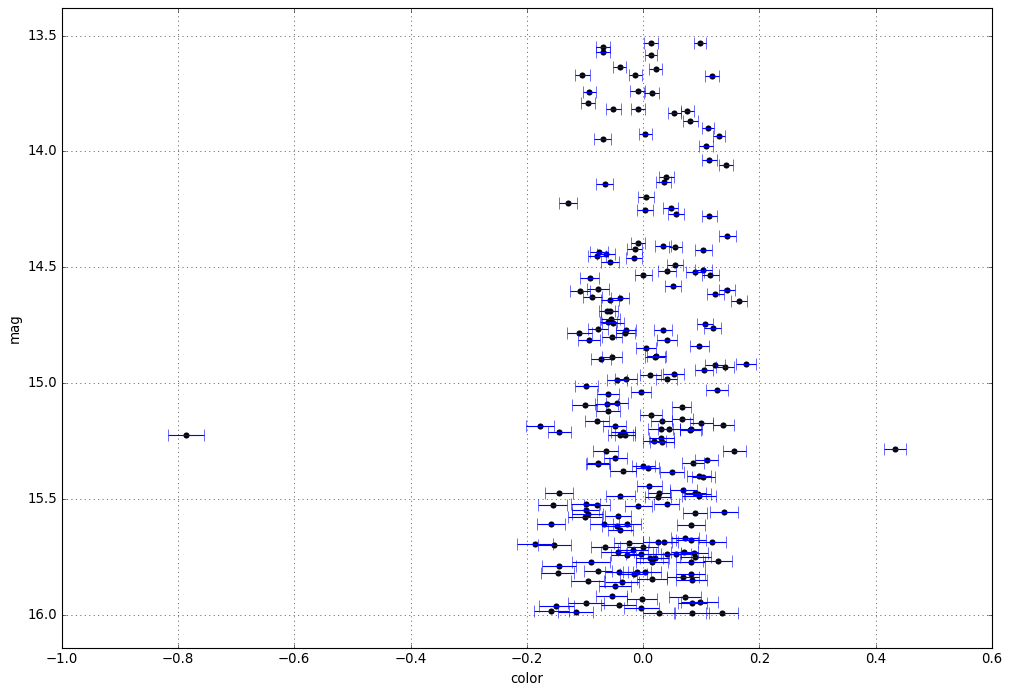

In [15]:
fig = plt.figure(figsize=(15,10), facecolor='w')
frame = fig.add_subplot(1,1,1)

frame.scatter(colorz, magz, c="k")
frame.errorbar(colorz, magz, xerr=(colorz_errors), capsize=5, ls='')
frame.set_ylim(max(magz)+0.15, min(magz)-0.15)
frame.set_xlabel('color')
frame.set_ylabel('mag')
frame.grid()
plt.show()

In [16]:
def logL_simp(p, data):
    mu1 = p[0]
    mu2 = p[1]
    alpha = p[2]
    
    color = data[0]
    mag = data[1]
    err = data[2]

    if alpha < 0 or alpha > 1.0 or mu1>np.mean(color) or mu2<np.mean(color):
        return(-np.inf)

    
    Ntot = len(color)
    
    var1 = err**2 
    var2 = err**2 

    _norm1 = 1/np.sqrt(2*np.pi*var1)
    _norm2 = 1/np.sqrt(2*np.pi*var2)

    P1 = _norm1 * np.exp(-(color - mu1)**2/(2*var1))
    P2 = _norm2 * np.exp(-(color - mu2)**2/(2*var2))

    P = Ntot*alpha*P1 + Ntot*(1 - alpha)*P2

    lnL = np.ma.sum(np.ma.log(P))
    return lnL



In [17]:
ptrue = [-0.05389244,  0.08470881,  0.56427866]
logL_simp(ptrue, Jpas_data_actual)

610.2732301008384

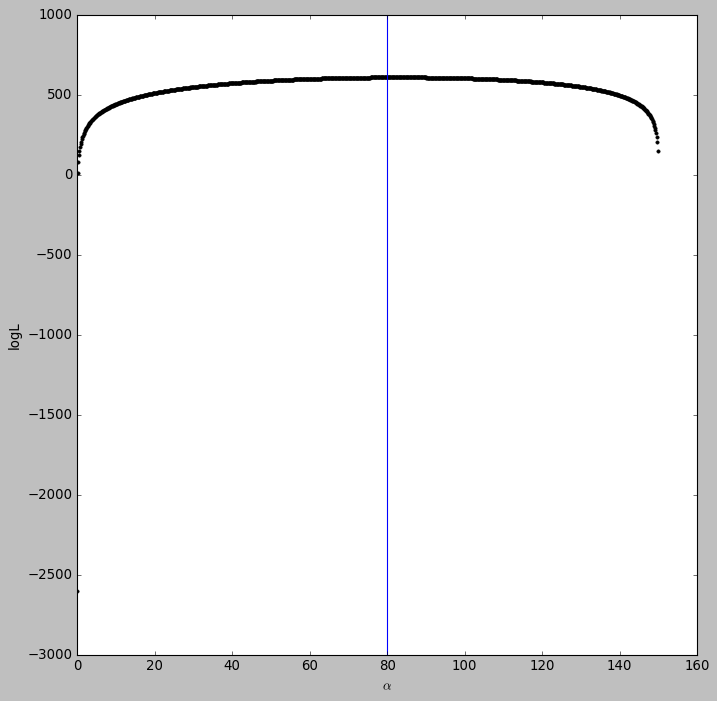

In [18]:
plt.figure(figsize=(10,10))

for A in np.arange(0, 1, 0.001):
    ptrue = [-0.05389244,  0.08470881,  A]
    plt.plot(A*150, logL_simp(ptrue, Jpas_data_actual), 'k.')
    #print(logL(ptrue, data_actual))
    
plt.xlabel(r'$\alpha$')
plt.ylabel('logL')
plt.axvline(80) #ish
plt.show()

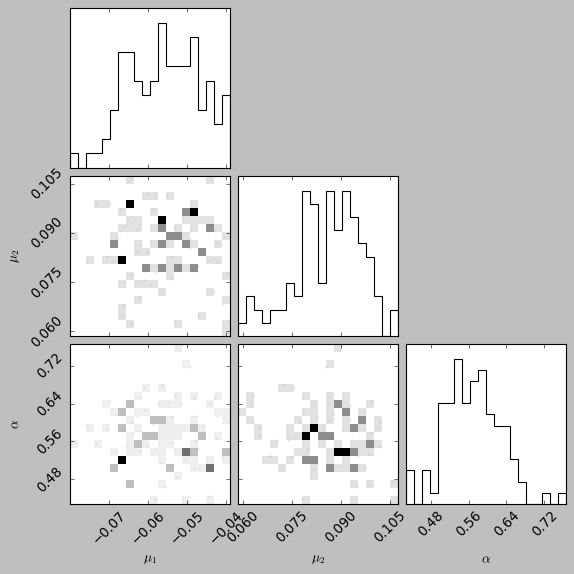

In [19]:
ndim, nwalkers = 5, 100

p0 = [-0.05389244,  0.08470881,  0.56427866]
pos = [ p0[0] + 0.01*np.random.randn(nwalkers),
        p0[1] + 0.01*np.random.randn(nwalkers),
        p0[2] + 0.05*np.random.randn(nwalkers)]
pos = np.array(pos).T

labelz = [r"$\mu_1$", r"$\mu_2$", r"$\alpha$"]
fig = corner.corner(pos, labels=labelz, plot_contours=False)

In [20]:
nwalkers, ndim = pos.shape
os.environ["OMP_NUM_THREADS"] = "8"

with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, logL_simp, args=[Jpas_data_actual,], pool=pool)
    state = sampler.run_mcmc(pos, 500, progress=True)  ## burn-in
    sampler.reset()
    state = sampler.run_mcmc(state, 200, progress=True)

100%|██████████| 200/200 [00:07<00:00, 26.54it/s]


In [21]:
flat_chain = sampler.get_chain(flat=True)

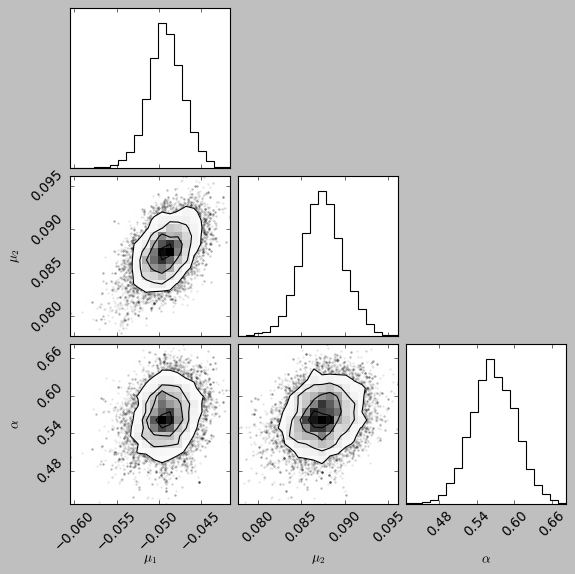

In [22]:
fig = corner.corner( flat_chain, labels=labelz)

In [23]:
func4 = lambda x: -1*logL_simp(x, Jpas_data_actual)
res4 = minimize(func4, (-0.1, 0.1, 0.53), method='SLSQP', tol=1e-10)
res4

     fun: -613.1194468202607
     jac: array([ 0.00429535,  0.00087738, -0.00023651])
 message: 'Optimization terminated successfully'
    nfev: 57
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([-0.04929481,  0.08728817,  0.5673695 ])

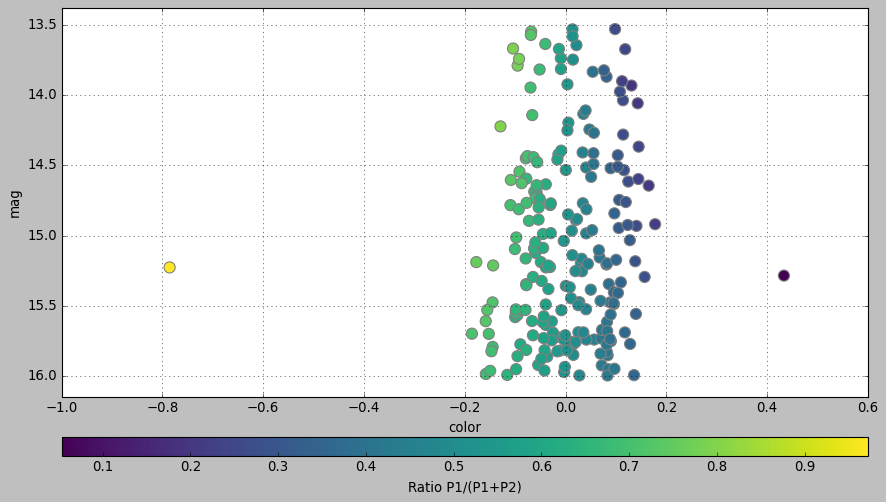

In [24]:
mu1, mu2, alpha = res4.x


_norm1 = 1/np.sqrt(2*np.pi*colorz_errors)
_norm2 = 1/np.sqrt(2*np.pi*colorz_errors)

P1 = _norm1 * np.exp(-(colorz - mu1)**2/(2*colorz_errors))
P2 = _norm2 * np.exp(-(colorz - mu2)**2/(2*colorz_errors))
P = alpha*P1 + (1-alpha)*P2

gaussian_ratio1 = P1/(P1+P2)

cmap = cm.viridis

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey="col", figsize=(13, 7))

f1 = axes

divider1 = make_axes_locatable(f1)
colbarframe1 = divider1.append_axes("bottom", size="5%", pad=0.5)

ax1 = f1.scatter(colorz, magz, marker="o", c=gaussian_ratio1,cmap=cmap , edgecolors="grey", s=100)
cbar1 = fig.colorbar(ax1, cax=colbarframe1, orientation="horizontal")
cbar1.set_label("Ratio P1/(P1+P2)")


f1.set_ylim(max(magz)+0.15, min(magz)-0.15)
    #ax.set_xlim(-0.22, 0.21)
f1.set_xlabel('color')
f1.set_ylabel('mag')
f1.grid()



In [32]:
ids = df.source_id.values[H][~np.isnan(col)][zone]

myFrame = vaex.from_arrays(source_id = ids, population_likelyhood = gaussian_ratio1, testCol = magz)

In [39]:
myFrame.export_hdf5("exportTest.hdf5")